## Chlorophyll-a estimates in the Amazon mouth

In [2]:
import os
os.chdir("/home/millieginty/Documents/git-repos/amazon/")

In [27]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


/home/millieginty/anaconda3/envs/geo_env/lib/python3.10/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 25 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x720cff6ea250>

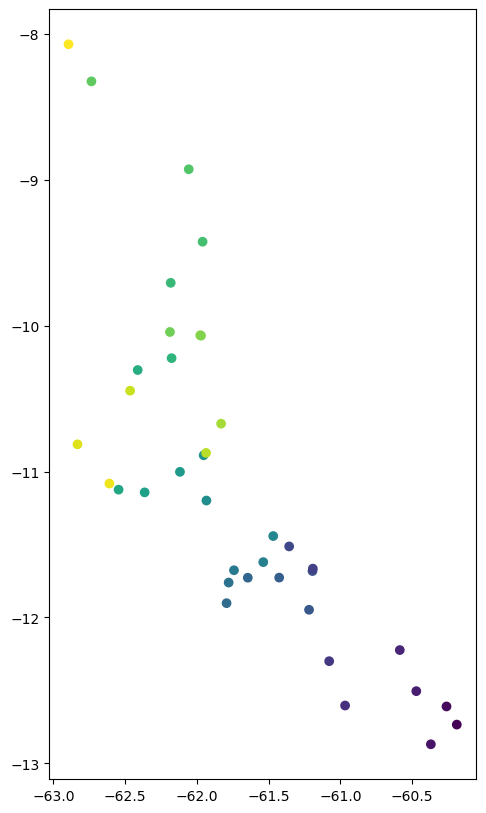

In [3]:
import pandas as pd  
import numpy as np  
import geopandas as gpd  
import matplotlib.pyplot as plt # plot our data and manipulate the plot
import contextily as ctx # add a default basemap under our polygons of interest
from shapely.geometry import Point, Polygon

# Read in the shapefile of the mouth and mainstem points
mouth = gpd.read_file('data/shapefiles/amzmouthpt_v/amzmouthpt_v.shp')
stem = gpd.read_file('data/shapefiles/amzmainstm_v/amzmainstm_v.shp')
sites = gpd.read_file('data/shapefiles/ext_sampling_sites/ext_sampling_sites.shp')

# Set the CRS for the geometry of the watershed polygons
sites_4326 = sites.to_crs(epsg=4326)

sample_sites = sites_4326.plot(column = 'PONTOS_ID', figsize=(10,10))

ctx.add_basemap(sample_sites) # add in the basemap


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x775307383ce0>

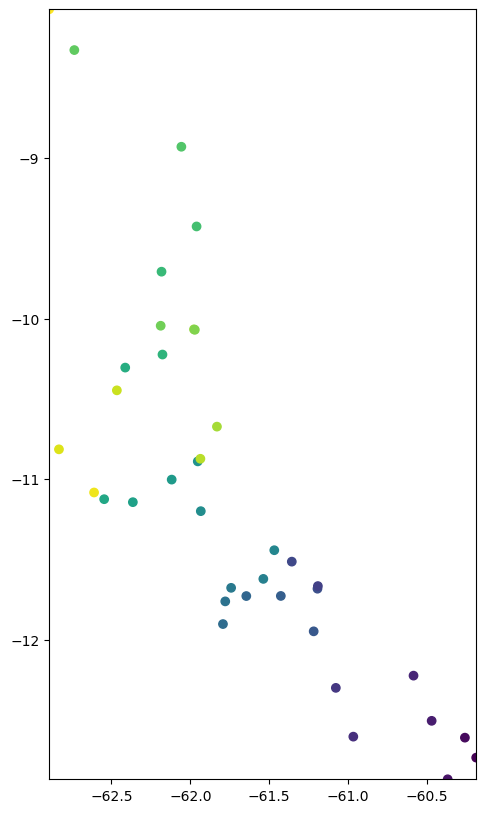

In [26]:
import pandas as pd  
import numpy as np  
import geopandas as gpd  
import matplotlib.pyplot as plt  
import contextily as ctx  
from shapely.geometry import Point, Polygon

# Read in the shapefile of the mouth and mainstem points
mouth = gpd.read_file('data/shapefiles/amzmouthpt_v/amzmouthpt_v.shp')
stem = gpd.read_file('data/shapefiles/amzmainstm_v/amzmainstm_v.shp')
sites = gpd.read_file('data/shapefiles/ext_sampling_sites/ext_sampling_sites.shp')

# Set the CRS for the geometry of the watershed polygons
sites_4326 = sites.to_crs(epsg=4326)

# Plot the sampling sites
ax = sites_4326.plot(column='PONTOS_ID', figsize=(10,10))

# Set the extent of the plot
ax.set_xlim(sites_4326.total_bounds[0], sites_4326.total_bounds[2])
ax.set_ylim(sites_4326.total_bounds[1], sites_4326.total_bounds[3])

# Add basemap
ctx.add_basemap(ax, crs=sites_4326.crs.to_string(), source=ctx.providers.Stamen.Terrain)

plt.show()

In [5]:
import geopandas as gpd
import folium

# Read in the shapefile of the sampling sites
sites = gpd.read_file('data/shapefiles/ext_sampling_sites/ext_sampling_sites.shp')

# Create a Folium map centered around the mean coordinates of the sampling sites
m = folium.Map(location=[sites.geometry.y.mean(), sites.geometry.x.mean()], zoom_start=10)

# Add the sampling sites to the map
for idx, site in sites.iterrows():
    folium.Marker([site.geometry.y, site.geometry.x], popup=site['PONTOS_ID']).add_to(m)

# Add a basemap
folium.TileLayer('Stamen Terrain').add_to(m)

# Save the map as an HTML file
m.save('sampling_sites_map.html')

In [6]:
from folium.plugins import folium_static

# Create a Folium map (same as before)
m = folium.Map(location=[sites.geometry.y.mean(), sites.geometry.x.mean()], zoom_start=10)

# Add the sampling sites to the map (same as before)

# Add a basemap (same as before)

# Convert the Folium map to a static image
folium_static(m)

ImportError: cannot import name 'folium_static' from 'folium.plugins' (/home/millieginty/anaconda3/envs/geo_env/lib/python3.10/site-packages/folium/plugins/__init__.py)